# Simulation Archive
A Simulation Archive (Rein & Tamayo 2017) is useful when one runs long simulations. With the Simulation Archive, one can easily take snapshots of the simulation, and then later restart and analyze it. Since Spring 2018, the default Simulation Archive version is 2. Version 2 works with all integrators and very few restrictions that apply (you need to be careful when using function pointers).

To illustrate the Simulation Archive, let us setup a simulation of a two planet system and turn on the Simulation Archive. This is done with the following code:

In [19]:
import rebound
import numpy as np


In [29]:
sa = rebound.SimulationArchive("simulationarchive.bin")

In [36]:
sa[0].units

{'length': None, 'mass': None, 'time': None}

Let's first print the number of snapshots and the time of the first and last snapshot in the archive:

In [30]:
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

Number of snapshots: 50
Time of first and last snapshot: 0.0, 3078762.4


We can access each snapshot by indexing the Simulation Archive. This returns a REBOUND simulation object that corresponds to that time. Everything is accurate down to the last bit. That means one could use this simulation object and restart the simulation, the final coordinates of the planets will be exactly the same as in the original simulation.

In [31]:
eN = np.zeros(len(sa))
aN = np.zeros(len(sa))
time = np.zeros(len(sa))


for i, sim in enumerate(sa):
    eN[i] = sim.particles[4].e
    aN[i] = sim.particles[4].a
    time[i] =sim.t/(2.*np.pi)

In [32]:
aN

array([23.07388126, 23.11171038, 23.14478229, 23.18204523, 23.21666978,
       23.24866678, 23.28179469, 23.31605114, 23.349947  , 23.38257702,
       23.41615752, 23.44979056, 23.48250916, 23.51471196, 23.55008302,
       23.57969014, 23.61267171, 23.64771151, 23.68067345, 23.71107642,
       23.73975804, 23.77767137, 23.79982197, 23.82870571, 23.86191368,
       23.8890694 , 23.9336289 , 23.96927028, 23.97493343, 24.00639608,
       24.06142872, 24.11279573, 24.18952989, 24.2328539 , 24.18657936,
       24.1983981 , 24.28701539, 24.32276498, 24.3106052 , 24.28307143,
       24.32731489, 24.34832412, 24.39778802, 24.43386857, 24.46985932,
       24.48005845, 24.50312271, 24.52353003, 24.49824997, 24.56135852])

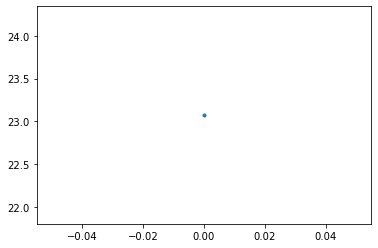

In [12]:

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(time,aN, '.')


One can also add manual snapshots when using automated intervals.